 _Authors: Petar Jerčić (pjercic@tugraz.at), Jana Lasser (jana.lasser@ds.mpg.de), David Garcia and Max Pellert._  
 _This teaching material is created for the course "Computational Modelling of Social Systems" at Uni Konstanz._

# Mesa Introductory Tutorial

This tutorial has been adapted from the Mesa package introductory tutorial [GitHub](https://github.com/projectmesa/mesa/blob/main/docs/tutorials/intro_tutorial.rst). It has been purposefully simplified for the context of this course.

Mesa has extensive [API documentation](https://mesa.readthedocs.io/en/stable/apis/api_main.html), but we will slowly go through the important objects and methods throughout the excercises, step-by-step.

The excercises will have a similar structure as follows:
1. Create the Basic Agent/Model
2. Run the Agent/Model Basic
3. Visualize the Agent/Model
4. Run the Agent/Model Visualization
5. Collect data to Analyze the Agent/Model
6. Run the Agent/Model Analysis
7. Create iteration Batch of the Agent/Model
8. Run the Agent/Model Batch
9. Run the Batch data Analysis

## Description

[Mesa](https://github.com/projectmesa/mesa) is a Python framework for
[agent-based modeling](https://en.wikipedia.org/wiki/Agent-based_model). Getting
started with Mesa is easy. In this tutorial, we will walk through
creating a simple model and progressively add functionality which will
illustrate Mesa’s core features.

The turorial will be given sequentially in 4 blocks:

1. The base for this tutorial is a very simple model of agents exchanging money. 
2. Next, we add *space* to allow agents to move. 
3. Then, we’ll cover two of Mesa’s analytic tools: the *data collector* and *batch runner*.
4. After that, we’ll add an *interactive visualization* which lets us watch the model as it runs. Finally, we go over how to write your own visualization module.

You can also find all the full code this tutorial describes in the **examples/boltzmann_wealth_model** directory of the Mesa examples repository (https://github.com/projectmesa/mesa-examples).

## Sample Model Description

The tutorial model is a very simple simulated agent-based economy, drawn
from econophysics and presenting a statistical mechanics approach to
wealth distribution. The rules of our tutorial model:

1. There are some number of agents.
2. All agents begin with 1 unit of money.
3. At every step of the model, an agent gives 1 unit of money (if they
   have it) to some other agent.

Despite its simplicity, this model yields results that are often
unexpected to those not familiar with it. For our purposes, it also
easily demonstrates Mesa’s core features.

## How to use and modify the code

These excercises are designed around a Mesa template that is given to you to reuse. You are not asked to perform any complex object programming, but instead we ask for understanding of the core features of the Mesa pyhton package. You will mostly have to modifly the existing template and code the ``Model`` and ``Agent``behavior using standard python code.

**Therefore, in this excercise, you are asked to fill your code where the comments state:**

``#[Your code here]``

Let’s get started.

## Building a sample model

Once the instalation of the neccesary requirements is ready you can start building the model.

- Python 3 is installed
- Jupyter Noteboks is installed (Anaconda or through Mesa)
- Mesa is installed

Now you can write models interactively in [Jupyter Notebook](http://jupyter.org/) cells.

# 1. Create the Basic Agent/Model

## Setting up the model

To begin writing the model code, we start with two core classes: one for
the overall model, the other for the agents. The model class holds the
model-level attributes, manages the agents, and generally handles the
global level of our model. Each instantiation of the model class will be
a specific model run. Each model will contain multiple agents, all of
which are instantiations of the agent class. Both the model and agent
classes are child classes of Mesa’s generic ``Model`` and ``Agent``
classes.

Each agent has only one variable: how much wealth it currently has.
(Each agent will also have a unique identifier (i.e., a name), stored in
the ``unique_id`` variable. Giving each agent a unique id is a good
practice when doing agent-based modeling.)

There is only one model-level parameter: how many agents the model
contains. When a new model is started, we want it to populate itself
with the given number of agents.

The beginning of both classes looks like this:

In [7]:
# Setting up the model - agen variables and model-level parameters
import mesa
print(mesa.__version__)

#!pip install seaborn
# Data visualization tools.
import seaborn as sns

# Has multi-dimensional arrays and matrices. Has a large collection of
# mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

3.1.5


## Adding the scheduler

Time in most agent-based models moves in steps, sometimes also called
**ticks**. At each step of the model, one or more of the agents –
usually all of them – are activated and take their own step, changing
internally and/or interacting with one another or the environment.

The **scheduler** is a special model component which controls the order
in which agents are activated. For example, all the agents may activate
in the same order every step; their order might be shuffled; we may try
to simulate all the agents acting at the same time; and more. Mesa
offers a few different built-in scheduler classes, with a common
interface. That makes it easy to change the activation regime a given
model uses, and see whether it changes the model behavior. This may not
seem important, but scheduling patterns can have an impact on your
results.

For now, let’s use one of the simplest ones: ``RandomActivation``, which
activates all the agents once per step, in random order. Every agent is
expected to have a ``step`` method. The step method is the action the
agent takes when it is activated by the model schedule. We add an agent
to the schedule using the ``add`` method; when we call the schedule’s
``step`` method, the model shuffles the order of the agents, then
activates and executes each agent’s ``step`` method.

With that in mind, the model code with the scheduler added looks like
this:

In [9]:
# Adding the scheduler - agent step and model step actions
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's attribute and set the initial values.
        self.wealth = 1

    def say_hi(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print(f"Hi, I am an agent, you can call me {str(self.unique_id)}.")


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n

        # Create n agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""

        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("say_hi")
 

### Running the model

At this point, we have a model which runs – it just doesn’t do anything.
You can see for yourself with a few easy lines. If you’ve been working
in an interactive session, you can create a model object directly. 

Then create the model object, and run it for one step:

In [11]:
# Test the model
starter_model = MoneyModel(10)
starter_model.step()

Hi, I am an agent, you can call me 10.
Hi, I am an agent, you can call me 5.
Hi, I am an agent, you can call me 7.
Hi, I am an agent, you can call me 8.
Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 9.
Hi, I am an agent, you can call me 6.


In [12]:
# Run this step a few times and see what happens! notice the order of the agents changes each time.
starter_model.step()

Hi, I am an agent, you can call me 6.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 10.
Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 5.
Hi, I am an agent, you can call me 9.
Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 7.
Hi, I am an agent, you can call me 8.


### Exercise

Try modifying the code above to have every agent print out its
``wealth`` when it is activated. Run a few steps of the model to see how
the agent activation order is shuffled each step.

## Agent Step

Now we just need to have the agents do what we intend for them to do:
check their wealth, and if they have the money, give one unit of it away
to another random agent. To allow the agent to choose another agent at
random, we use the ``model.random`` random-number generator. This works
just like Python’s ``random`` module, but with a fixed seed set when the
model is instantiated, that can be used to replicate a specific model
run later.

To pick an agent at random, we need a list of all agents. Notice that
there isn’t such a list explicitly in the model. The scheduler, however,
does have an internal list of all the agents it is scheduled to
activate.

With that in mind, we rewrite the agent ``step`` method, like this:

In [15]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def exchange(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1
                
class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n):
        super().__init__()
        self.num_agents = n

        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""

        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("exchange")

# 2. Run the Agent/Model Basic

### Running your first model

With that last piece in hand, it’s time for the first rudimentary run of
the model.

Now let’s create a model with 10 agents, and run it for 10 steps.

In [18]:
model = MoneyModel(10)  # Tells the model to create 10 agents
for _ in range(
    30
):  # Runs the model for 10 steps; an underscore is common convention for a variable that is not used
    model.step()

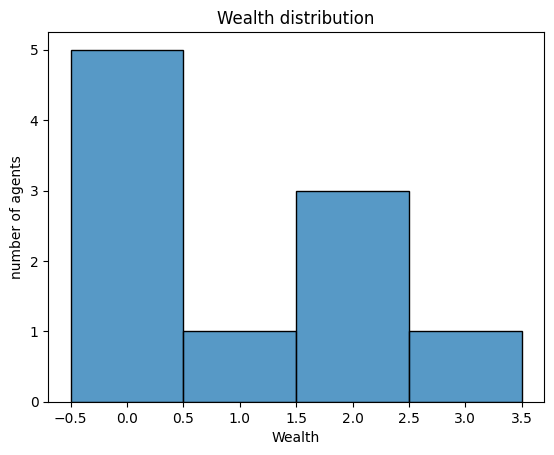

In [19]:
agent_wealth = [a.wealth for a in model.agents]
# Create a histogram with seaborn
g = sns.histplot(agent_wealth, discrete=True)
g.set(
    title="Wealth distribution", xlabel="Wealth", ylabel="number of agents"
);  # The semicolon is just to avoid printing the object representation

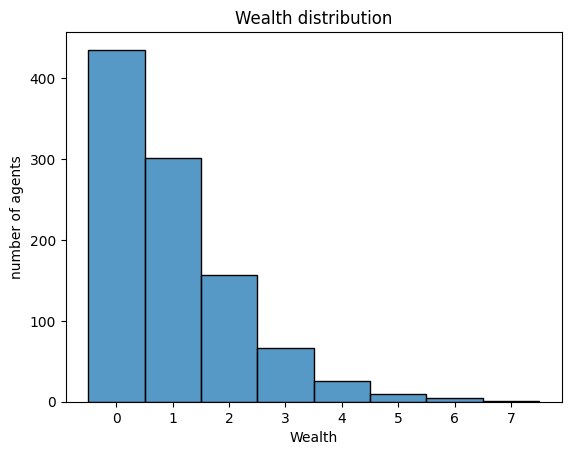

In [20]:
all_wealth = []
# This runs the model 100 times, each model executing 10 steps.
for _ in range(100):
    # Run the model
    model = MoneyModel(10)
    for _ in range(30):
        model.step()

    # Store the results
    for agent in model.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

## Adding space

Many ABMs have a spatial element, with agents moving around and
interacting with nearby neighbors. Mesa currently supports two overall
kinds of spaces: grid, and continuous. Grids are divided into cells, and
agents can only be on a particular cell, like pieces on a chess board.
Continuous space, in contrast, allows agents to have any arbitrary
position. Both grids and continuous spaces are frequently
[toroidal](https://en.wikipedia.org/wiki/Toroidal_graph), meaning
that the edges wrap around, with cells on the right edge connected to
those on the left edge, and the top to the bottom. This prevents some
cells having fewer neighbors than others, or agents being able to go off
the edge of the environment.

Let’s add a simple spatial element to our model by putting our agents on
a grid and make them walk around at random. Instead of giving their unit
of money to any random agent, they’ll give it to an agent on the same
cell.

Mesa has two main types of grids: ``SingleGrid`` and ``MultiGrid``.
``SingleGrid`` enforces at most one agent per cell; ``MultiGrid`` allows
multiple agents to be in the same cell. Since we want agents to be able
to share a cell, we use ``MultiGrid``.

`from mesa.space import MultiGrid`

We instantiate a grid with width and height parameters, and a boolean as
to whether the grid is toroidal. Let’s make width and height model
parameters, in addition to the number of agents, and have the grid
always be toroidal. We can place agents on a grid with the grid’s
``place_agent`` method, which takes an agent and an (x, y) tuple of the
coordinates to place the agent.

Under the hood, each agent’s position is stored in two ways: the agent
is contained in the grid in the cell it is currently in, and the agent
has a ``pos`` variable with an (x, y) coordinate tuple. The
``place_agent`` method adds the coordinate to the agent automatically.

In [22]:
# Adding space
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        super().__init__(model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        # Ensure agent is not giving money to itself
        cellmates.pop(cellmates.index(self))
        if len(cellmates) > 0:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, width, height, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = mesa.space.MultiGrid(width, height, True)

        # Create agents
        agents = MoneyAgent.create_agents(model=self, n=n)
        # Create x and y coordinates for agents
        x = self.rng.integers(0, self.grid.width, size=(n,))
        y = self.rng.integers(0, self.grid.height, size=(n,))
        for a, i, j in zip(agents, x, y):
            # Add the agent to a random grid cell
            self.grid.place_agent(a, (i, j))

    def step(self):
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

### Running the model

Now we need to add to the agents’ behaviors, letting them move around
and only give money to other agents in the same cell.

First let’s handle movement, and have the agents move to a neighboring
cell. The grid object provides a ``move_agent`` method, which like you’d
imagine, moves an agent to a given cell. That still leaves us to get the
possible neighboring cells to move to. There are a couple ways to do
this. One is to use the current coordinates, and loop over all
coordinates +/- 1 away from it. For example:

```
neighbors = []
x, y = self.pos
for dx in [-1, 0, 1]:
   for dy in [-1, 0, 1]:
       neighbors.append((x+dx, y+dy))
```

But there’s an even simpler way, using the grid’s built-in
``get_neighborhood`` method, which returns all the neighbors of a given
cell. This method can get two types of cell neighborhoods:
[Moore](https://en.wikipedia.org/wiki/Moore_neighborhood) (includes
all 8 surrounding squares), and [Von
Neumann](https://en.wikipedia.org/wiki/Von_Neumann_neighborhood) (only
up/down/left/right). It also needs an argument as to whether to include
the center cell itself as one of the neighbors.

That is why the agent’s ``move`` method looks like above.

Let’s create a model with 50 agents on a 10x10 grid, and run it for 20
steps.

In [25]:
# Test the model
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()

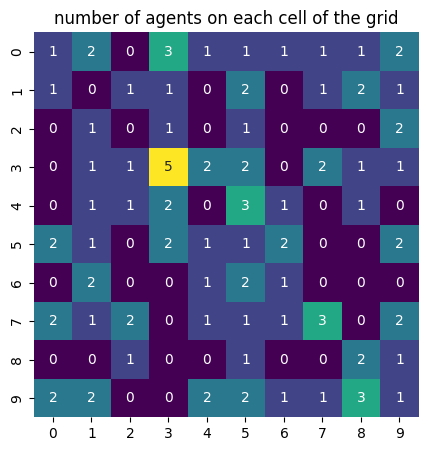

In [26]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
# Plot using seaborn, with a visual size of 5x5
g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(5, 5)
g.set(title="number of agents on each cell of the grid");

# 3. Visualize the Agent/Model

In [28]:
import mesa
print(f"Mesa version: {mesa.__version__}")

from mesa.visualization import SolaraViz, make_plot_component, make_space_component

# Define how your agents should be visualized
def agent_portrayal(agent):
    return {
        "shape": "circle",
        "r": 0.8,
        "color": "blue",
        "text": str(agent.wealth),
        "text_color": "white",
    }

# Model parameters passed to SolaraViz to instantiate the model
model_params = {
    "n": 50,
    "width": 10,
    "height": 10,
}


Mesa version: 3.1.5


<IPython.core.display.Javascript object>

# 4. Run the Agent/Model Visualization

NOTE: Runtime server error is normal and expected when running visualization code below. This visualization code was made for command line execution (not explicitly for Jupyter Notebooks), so we are **forcing** it's use.

Just make sure to increment the port number counter each visualization run, to be able to use it.

In [30]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted(agent_wealths)
    n = model.num_agents
    B = sum(xi * (n - i) for i, xi in enumerate(x)) / (n * sum(x))
    return 1 + (1 / n) - 2 * B


class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        super().__init__(model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        # Ensure agent is not giving money to itself
        cellmates.pop(cellmates.index(self))
        if len(cellmates) > 0:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, width, height):
        super().__init__()
        self.num_agents = n
        # create the space
        self.grid = mesa.space.MultiGrid(width, height, True)
        # collect the output
        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini}, agent_reporters={"Wealth": "wealth"}
        )

        # Create agents
        agents = MoneyAgent.create_agents(model=self, n=n)
        # Create x and y positions for agents
        x = self.rng.integers(0, self.grid.width, size=(n,))
        y = self.rng.integers(0, self.grid.height, size=(n,))
        for a, i, j in zip(agents, x, y):
            # Add the agent to a random grid cell
            self.grid.place_agent(a, (i, j))

    def step(self):
        self.datacollector.collect(self)
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

In [31]:
model_params

{'n': 50, 'width': 10, 'height': 10}

In [32]:
# Create initial model instance
money_model = MoneyModel(n=50, width=10, height=10) #keyword arguments

SpaceGraph = make_space_component(agent_portrayal)
GiniPlot = make_plot_component("Gini")

page = SolaraViz(
    money_model,
    components=[SpaceGraph, GiniPlot],
    model_params=model_params,
    name="Boltzmann Wealth Model",
)
# This is required to render the visualization in the Jupyter notebook
page

C:\Users\peers\anaconda3\envs\mesa_new\Lib\site-packages\mesa\visualization\mpl_space_drawing.py:341: UserWarning: the following fields are not used in agent portrayal and thus ignored: shape, r, text, text_color.
  arguments = collect_agent_data(space, agent_portrayal, size=s_default)
C:\Users\peers\anaconda3\envs\mesa_new\Lib\site-packages\mesa\visualization\mpl_space_drawing.py:341: UserWarning: the following fields are not used in agent portrayal and thus ignored: shape, r, text, text_color.
  arguments = collect_agent_data(space, agent_portrayal, size=s_default)


Cannot show ipywidgets in text

# 5. Collect data to Analyze the Agent/Model

### Collecting Data

So far, at the end of every model run, we’ve had to go and write our own
code to get the data out of the model. This has two problems: it isn’t
very efficient, and it only gives us end results. If we wanted to know
the wealth of each agent at each step, we’d have to add that to the loop
of executing steps, and figure out some way to store the data.

Since one of the main goals of agent-based modeling is generating data
for analysis, Mesa provides a class which can handle data collection and
storage for us and make it easier to analyze.

The data collector stores three categories of data: model-level
variables, agent-level variables, and tables (which are a catch-all for
everything else). Model- and agent-level variables are added to the data
collector along with a function for collecting them. Model-level
collection functions take a model object as an input, while agent-level
collection functions take an agent object as an input. Both then return
a value computed from the model or each agent at their current state.
When the data collector’s ``collect`` method is called, with a model
object as its argument, it applies each model-level collection function
to the model, and stores the results in a dictionary, associating the
current value with the current step of the model. Similarly, the method
applies each agent-level collection function to each agent currently in
the schedule, associating the resulting value with the step of the
model, and the agent’s ``unique_id``.

Let’s add a DataCollector to the model, and collect two variables. At
the agent level, we want to collect every agent’s wealth at every step.
At the model level, let’s measure the model’s [Gini
Coefficient](https://en.wikipedia.org/wiki/Gini_coefficient), a
measure of wealth inequality.

At every step of the model, the datacollector will collect and store the
model-level current Gini coefficient, as well as each agent’s wealth,
associating each with the current step.

In [35]:
# Collecting Data

from mesa.datacollection import DataCollector


def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B


class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
        
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(Model):
    """A model with some number of agents."""

    def __init__(self, N, width, height):
        super().__init__()
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        self.datacollector = DataCollector(    # < Note that we have both an agent and model data collector
            model_reporters={"Gini": compute_gini}, agent_reporters={"Wealth": "wealth"}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

NameError: name 'Agent' is not defined

### Running the model

We run the model just as we did above. It is especially in those cases an interactive
session, especially via a Notebook, comes in handy: the DataCollector
can export the data it’s collected as a pandas DataFrame, for easy
interactive analysis.

In [ ]:
# Test the model

model = MoneyModel(50, 10, 10)
for i in range(100):
    model.step()

To get the series of Gini coefficients as a pandas DataFrame:

# 6. Run the Agent/Model Analysis

In [ ]:
# Plot coefficients

gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

Similarly, we can get the agent-wealth data:

In [ ]:
# Get agent data
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

You’ll see that the DataFrame’s index is pairings of model step and
agent ID. You can analyze it the way you would any other DataFrame. For
example, to get a histogram of agent wealth at the model’s end:

In [ ]:
# Plot histogram of agents wealth

end_wealth = agent_wealth.xs(99, level="Step")
end_wealth.Wealth.hist()

Or to plot the wealth of a given agent (in this example, agent 14):

In [ ]:
# Plot the trend of wealth of given agent

one_agent_wealth = agent_wealth.xs(14, level="AgentID")
one_agent_wealth.Wealth.plot()

# 7. Create iteration Batch of the Agent/Model

### Batch Run

Like we mentioned above, you usually won’t run a model only once, but
multiple times, with fixed parameters to find the overall distributions
the model generates, and with varying parameters to analyze how they
drive the model’s outputs and behaviors. Instead of needing to write
nested for-loops for each model, Mesa provides a ``batch_run`` function
which automates it for you.

The batch runner also requires an additional variable ``self.running``
for the MoneyModel class. This variable enables conditional shut off of
the model once a condition is met. In this example it will be set as
True indefinitely.

In [ ]:
# Batch Run
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B



class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
        
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(Model):
    """A model with some number of agents."""

    def __init__(self, N, width, height):
        super().__init__()
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.running = True
        
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        self.datacollector = DataCollector(
            model_reporters={"Gini": compute_gini}, agent_reporters={"Wealth": "wealth"}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

# 8. Run the Agent/Model Batch

### Running the model

We call ``batch_run`` with the following arguments:

* ``model_cls``

  The model class that is used for the batch run.

* ``parameters``

  A dictionary containing all the parameters of the model class and
  desired values to use for the batch run as key-value pairs. Each
  value can either be fixed ( e.g. ``{"height": 10, "width": 10}``)
  or an iterable (e.g. ``{"N": range(10, 500, 10)}``). ``batch_run``
  will then generate all possible parameter combinations based on this
  dictionary and run the model ``iterations`` times for each combination.

* ``number_processes``

  Number of processors used to run the sweep in parallel. Optional.
  If not specified, defaults to use all the available processors.

  Note: Multiprocessing does make debugging challenging. If your
  parameter sweeps are resulting in unexpected errors set ``number_processes = 1``.
  
  Also, if your batcher is stuck and is not running for some reason, try also setting ``number_processes = 1``, since this issue might also be related to multiprocessing issues.

* ``iterations``

  The number of iterations to run each parameter combination for. Optional.
  If not specified, defaults to 1.

* ``data_collection_period``

  The length of the period (number of steps) after which the model and
  agent reporters collect data. Optional. If not specified, defaults to -1,
  i.e. only at the end of each episode.

* ``max_steps``

  The maximum number of time steps after which the model halts. An episode
  does either end when ``self.running`` of the model class is set to
  ``False`` or when ``model.schedule.steps == max_steps`` is reached.
  Optional. If not specified, defaults to 1000.

* ``display_progress``

  Display the batch run progress. Optional. If not specified, defaults to ``True``.

In the following example, we hold the height and width fixed, and vary
the number of agents. We tell the batch runner to run 5 instantiations
of the model with each number of agents, and to run each for 100 steps.

We want to keep track of

1. the Gini coefficient value and
2. the individual agent’s wealth development.

Since for the latter changes at each time step might be interesting, we
set ``data_collection_period = 1``.

Note: The total number of runs is 245 (= 49 different populations \* 5
iterations per population). However, the resulting list of dictionaries
will be of length 6186250 (= 250 average agents per population \* 49
different populations \* 5 iterations per population \* 101 steps per
iteration).

In [ ]:
# Test the batch model
# If your batcher is stuck and is not running for some reason, try setting number_processes = 1

from mesa.batchrunner import batch_run

params = {"width": 10, "height": 10, "N": range(10, 500, 10)}

results = batch_run(
    MoneyModel,
    parameters=params,
    iterations=5,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

### Data collection

To further analyze the return of the ``batch_run`` function, we convert
the list of dictionaries to a Pandas DataFrame and print its keys.

# 9. Run the Batch data Analysis

In [ ]:
# Collect batch data as Pandas dataframe

import pandas as pd

results_df = pd.DataFrame(results)
results_df.head()

### Data visualization

First, we want to take a closer look at how the Gini coefficient at the
end of each episode changes as we increase the size of the population.
For this, we filter our results to only contain the data of one agent
(the Gini coefficient will be the same for the entire population at any
time) at the 100th step of each episode and then scatter-plot the values
for the Gini coefficient over the the number of agents. Notice there are
five values for each population size since we set ``iterations=5`` when
calling the batch run.

In [ ]:
# Trend of coefficients after each iteration

results_filtered = results_df[(results_df.AgentID == 0) & (results_df.Step == 100)]
results_filtered.plot.scatter('N', 'Gini')

Second, we want to display the agent’s wealth at each time step of one
specific episode. To do this, we again filter our large data frame, this
time with a fixed number of agents and only for a specific iteration of
that population. To print the results, we convert the filtered data
frame to a string specifying the desired columns to print.

A. Show agent’s wealth at each time step of one specific episode (e.g., AgentID)

In [ ]:
# First, we filter the results
one_episode_wealth = results_df[(results_df.N == 10) & (results_df.iteration == 2)]
one_episode_wealth[one_episode_wealth.AgentID == 0].Wealth.plot()

Lastly, we want to take a look at the development of the Gini
coefficient over the course of one iteration. Filtering and printing
looks almost the same as above, only this time we choose a different
episode.

B. Development of the coefficient over the course of one iteration

In [ ]:
results_one_episode = results_df[
    (results_df.N == 10) & (results_df.iteration == 1) & (results_df.AgentID == 0)
]
results_one_episode.Gini.plot()

## Happy Modeling!

# Appendix

# 3. Visualize the Agent/Model - interactive advanced

In [ ]:
from mesa.visualization.modules import CanvasGrid, ChartModule, TextElement
from mesa.visualization.ModularVisualization import ModularServer
from mesa.visualization.UserParam import Slider

class MoneyElement(TextElement):
    '''
    Display a text count of how many happy agents there are.
    '''

    def render(self, model):
        return "Money agents: " + str(model.num_agents)

def agent_portrayal(agent):
    '''
    Portrayal Method for canvas
    '''
    if agent is None:
        return
    portrayal = {"Shape": "circle", "r": 0.5, "Filled": "true", "Layer": 0}

    if agent.wealth == 0:
        portrayal["Color"] = "Red"
    else:
        portrayal["Color"] = "Blue"
    
    return portrayal

text = MoneyElement()
grid = CanvasGrid(agent_portrayal, 10, 10, 500, 500)
chart = ChartModule([{"Label": "Gini", "Color": "#0000FF"}], data_collector_name="datacollector")

model_params = {
    "N": Slider(
        "Number of agents",
        100,
        2,
        200,
        1,
        description="Choose how many agents to include in the model",
    ),
    "width": 10,
    "height": 10,
}

server = ModularServer(MoneyModel,
                       [grid, text, chart],
                       "Money Model",
                       model_params)
server.port = 8526 # The default
server.launch()